In [122]:
#installing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb

In [123]:
#reading from the csv file
data = pd.read_csv("movies.csv")
df = data.copy()

In [124]:
threshold = 20000
df = df[df['votes'] >= threshold]
df.shape

(4694, 15)

In [125]:
#dropping columns that are almost unique,so they doesn't contribute in predicting target variable
df.drop(columns=['company', 'country', 'director', 'genre', 'name', 'rating', 'star', 'writer','released'],inplace=True)

In [126]:
#Droping the samples that have missing values
df.dropna(inplace=True)

In [127]:
df.head()

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0


In [128]:
df.tail()

,year,score,votes,budget,gross,runtime
7646,2020,7.1,186000.0,7000000.0,143151000.0,124.0
7648,2020,6.6,140000.0,90000000.0,426505244.0,124.0
7649,2020,6.5,102000.0,85000000.0,319715683.0,99.0
7650,2020,5.6,53000.0,175000000.0,245487753.0,101.0
7651,2020,6.8,42000.0,135000000.0,111105497.0,100.0


In [129]:
df.describe()

,year,score,votes,budget,gross,runtime
count,4036.000000,4036.000000,4.036000e+03,4.036000e+03,4.036000e+03,4036.000000
mean,2004.181615,6.562686,1.516444e+05,4.313738e+07,1.341142e+08,109.930624
std,9.728608,0.937007,2.011565e+05,4.536876e+07,2.079110e+08,18.857192
min,1980.000000,1.900000,2.000000e+04,6.000000e+03,2.554000e+03,63.000000
25%,1998.000000,6.100000,4.300000e+04,1.300000e+07,2.295031e+07,96.000000
50%,2006.000000,6.600000,8.300000e+04,2.800000e+07,6.162046e+07,107.000000
75%,2012.000000,7.200000,1.760000e+05,5.500000e+07,1.578448e+08,120.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [130]:
# Calculate collection percentage (if not already calculated)
if "collection" not in df.columns:
    df["collection"] = (df["gross"] / df["budget"]) * 100

In [131]:
# Apply labels based on collection percentage
df["label"] = pd.cut(df["collection"], bins=[0, 195, float("inf")],
                     labels=["Flop", "Hit"])

# Print the transformed DataFrame
print(df)

      year  score      votes       budget        gross  runtime   collection  \
0     1980    8.4   927000.0   19000000.0   46998772.0    146.0   247.361958   
1     1980    5.8    65000.0    4500000.0   58853106.0    104.0  1307.846800   
2     1980    8.7  1200000.0   18000000.0  538375067.0    124.0  2990.972594   
3     1980    7.7   221000.0    3500000.0   83453539.0     88.0  2384.386829   
4     1980    7.3   108000.0    6000000.0   39846344.0     98.0   664.105733   
...    ...    ...        ...          ...          ...      ...          ...   
7646  2020    7.1   186000.0    7000000.0  143151000.0    124.0  2045.014286   
7648  2020    6.6   140000.0   90000000.0  426505244.0    124.0   473.894716   
7649  2020    6.5   102000.0   85000000.0  319715683.0     99.0   376.136098   
7650  2020    5.6    53000.0  175000000.0  245487753.0    101.0   140.278716   
7651  2020    6.8    42000.0  135000000.0  111105497.0    100.0    82.300368   

     label  
0      Hit  
1      Hit  


In [132]:
#Removing the column "gross" and "collection_percentage" since we have "label"
df.drop(columns=['gross','budget','collection'],inplace=True)

In [133]:
df.shape

(4036, 5)

Text(0.5, 1.0, 'Categorization of Movies')

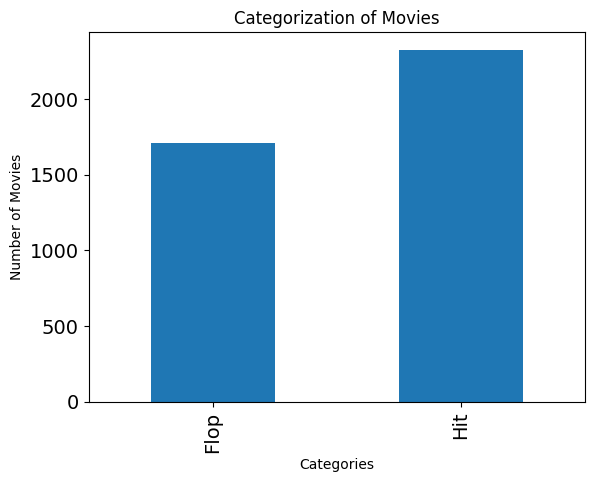

In [134]:
#Bar plot of classes
df.groupby(['label']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

In [135]:
df.head()

,year,score,votes,runtime,label
0,1980,8.4,927000.0,146.0,Hit
1,1980,5.8,65000.0,104.0,Hit
2,1980,8.7,1200000.0,124.0,Hit
3,1980,7.7,221000.0,88.0,Hit
4,1980,7.3,108000.0,98.0,Hit


In [136]:
df.tail()

,year,score,votes,runtime,label
7646,2020,7.1,186000.0,124.0,Hit
7648,2020,6.6,140000.0,124.0,Hit
7649,2020,6.5,102000.0,99.0,Hit
7650,2020,5.6,53000.0,101.0,Flop
7651,2020,6.8,42000.0,100.0,Flop


In [137]:
#input features
X = df.drop('label', axis=1)
#target variable
y = df['label']
y

0        Hit
1        Hit
2        Hit
3        Hit
4        Hit
        ... 
7646     Hit
7648     Hit
7649     Hit
7650    Flop
7651    Flop
Name: label, Length: 4036, dtype: category
Categories (2, object): ['Flop' < 'Hit']

In [138]:
from scipy.stats import norm

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.parameters.append([])
            for col in X_c.T:
                mean, std = np.mean(col), np.std(col)
                self.parameters[i].append((mean, std))

    def calculate_probability(self, x, mean, std):
        return norm.logpdf(x, loc=mean, scale=std)

    def predict_instance(self, x):
        posteriors = []

        for i, c in enumerate(self.classes):
            prior = np.log(len(X[y == c]) / len(X))
            posterior = sum(np.log(self.calculate_probability(x[i], *param)) for param in self.parameters[i])
            posterior += prior
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return [self.predict_instance(x) for x in X]

In [139]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, stratify = y)
print(X_train.shape)
print(y_train.shape)

(3228, 4)
(3228,)


In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.naive_bayes import GaussianNB

#model = GaussianNB()
model = GaussianNaiveBayes()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

<ipython-input-138-7c4049b4d753>:23: RuntimeWarning: invalid value encountered in log
  posterior = sum(np.log(self.calculate_probability(x[i], *param)) for param in self.parameters[i])


<Figure size 800x600 with 0 Axes>

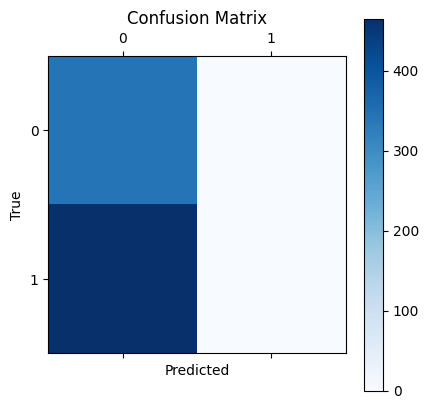

In [141]:
#Confusion matrix visualization
plt.figure(figsize=(8, 6))
plt.matshow(confusion_matrix(y_test, y_pred), cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [142]:
# Assuming you have imported necessary libraries and have your data ready
from sklearn.feature_selection import f_classif
import pandas as pd

# Assuming X and y are your feature matrix and target variable
# Use f_classif to compute ANOVA F-values and p-values
f_scores, p_values = f_classif(X, y)

# Create a DataFrame with f_scores and p_values
feature_importances = pd.DataFrame({"f_score": f_scores, "p_value": p_values})
print(feature_importances)

      f_score       p_value
0    7.409699  6.515194e-03
1   81.622316  2.500699e-19
2  396.203516  3.588803e-84
3    0.906594  3.410768e-01


In [143]:
#Accuracy and validity measurements
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.4245049504950495
              precision    recall  f1-score   support

        Flop       0.42      1.00      0.60       343
         Hit       0.00      0.00      0.00       465

    accuracy                           0.42       808
   macro avg       0.21      0.50      0.30       808
weighted avg       0.18      0.42      0.25       808



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
